In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
sns.set_style('whitegrid')
idx = pd.IndexSlice

with pd.HDFStore('data/assets.h5') as store:
    data = store['engineered_features']

In [2]:
dummy_data = pd.get_dummies(data, columns=['year','month', 'msize', 'age',  'sector'],
                            prefix=['year','month', 'msize', 'age', ''],
                            prefix_sep=['_', '_', '_', '_', ''])
dummy_data = dummy_data.rename(columns={c:c.replace('.0', '') for c in dummy_data.columns})
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 358914 entries, ('A', Timestamp('2001-01-31 00:00:00')) to ('ZUMZ', Timestamp('2018-02-28 00:00:00'))
Data columns (total 88 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   return_1m              358914 non-null  float64
 1   return_2m              358914 non-null  float64
 2   return_3m              358914 non-null  float64
 3   return_6m              358914 non-null  float64
 4   return_9m              358914 non-null  float64
 5   return_12m             358914 non-null  float64
 6   Mkt-RF                 358914 non-null  float64
 7   SMB                    358914 non-null  float64
 8   HML                    358914 non-null  float64
 9   RMW                    358914 non-null  float64
 10  CMA                    358914 non-null  float64
 11  momentum_2             358914 non-null  float64
 12  momentum_3             358914 non-null  float64
 13  momentum_6     

In [12]:
pd.concat([dummy_data.head(10), dummy_data.tail()])

return_1m  return_2m  return_3m  return_6m  return_9m  \
ticker date                                                                
A      2001-01-31  -0.003653   0.022360   0.056104   0.049811  -0.052500   
       2001-02-28  -0.329564  -0.189115  -0.116435  -0.084141  -0.076425   
       2001-03-31  -0.146389  -0.249443  -0.175116  -0.074628  -0.092690   
       2001-04-30   0.269444   0.040966  -0.105747  -0.028185  -0.004837   
       2001-05-31  -0.140220   0.044721  -0.023317  -0.071042  -0.064299   
       2001-06-30  -0.031008  -0.087246   0.018842  -0.083252  -0.044465   
       2001-07-31  -0.119692  -0.076414  -0.098192  -0.101978  -0.052105   
       2001-08-31  -0.073750  -0.097014  -0.075527  -0.049781  -0.072540   
       2001-09-30  -0.262264  -0.173364  -0.155847  -0.072607  -0.108119   
       2001-10-31   0.139130  -0.083279  -0.080114  -0.089198  -0.094748   
ZUMZ   2017-10-31  -0.024862   0.190660   0.115956  -0.002805  -0.014066   
       2017-11-30   0.235127   0.097461   0.205302   0.073430   0.007402   
       2017-12-31  -0.044725   0.086226   0.047857   0.090987   0.014465   
       2018-01-31  -0.003601  -0.024380   0.055418   0.085265   0.016237   
       2018-02-28  -0.050602  -0.027386  -0.033200   0.079484   0.036640   

                   return_12m    Mkt-RF       SMB       HML       RMW  ...  \
ticker date                                                            ...   
A      2001-01-31   -0.015988  1.262247  0.577372 -0.677952 -1.241965  ...   
       2001-02-28   -0.084537  1.262247  0.577372 -0.677952 -1.241965  ...   
       2001-03-31   -0.096606  1.262247  0.577372 -0.677952 -1.241965  ...   
       2001-04-30   -0.066102  1.262247  0.577372 -0.677952 -1.241965  ...   
       2001-05-31   -0.063425  1.262247  0.577372 -0.677952 -1.241965  ...   
       2001-06-30   -0.066007  1.262247  0.577372 -0.677952 -1.241965  ...   
       2001-07-31   -0.029045  1.262247  0.577372 -0.677952 -1.241965  ...   
       2001-08-31   -0.067119  1.262247  0.577372 -0.677952 -1.241965  ...   
       2001-09-30   -0.073618  1.262247  0.577372 -0.677952 -1.241965  ...   
       2001-10-31   -0.059186  1.262247  0.577372 -0.677952 -1.241965  ...   
ZUMZ   2017-10-31   -0.019115  0.118684  0.283629  1.061429  2.597181  ...   
       2017-11-30   -0.010687 -0.772268  1.001880  1.353344  2.953964  ...   
       2017-12-31   -0.003996 -0.772493  1.331478  1.327658  3.467731  ...   
       2018-01-31    0.002864 -0.965140  1.664637  1.528651  3.650790  ...   
       2018-02-28   -0.002905  0.074156  1.167027  1.322157  2.983583  ...   

                   Consumer Non-Durables  Consumer Services  Energy  Finance  \
ticker date                                                                    
A      2001-01-31                      0                  0       0        0   
       2001-02-28                      0                  0       0        0   
       2001-03-31                      0                  0       0        0   
       2001-04-30                      0                  0       0        0   
       2001-05-31                      0                  0       0        0   
       2001-06-30                      0                  0       0        0   
       2001-07-31                      0                  0       0        0   
       2001-08-31                      0                  0       0        0   
       2001-09-30                      0                  0       0        0   
       2001-10-31                      0                  0       0        0   
ZUMZ   2017-10-31                      0                  1       0        0   
       2017-11-30                      0                  1       0        0   
       2017-12-31                      0                  1       0        0   
       2018-01-31                      0                  1       0        0   
       2018-02-28                      0                  1       0        0   

                   Health Care  Miscel

In [3]:
target_labels = [f'target_{i}m' for i in [1,2,3,6,12]]
targets = data.dropna().loc[:, target_labels]

features = data.dropna().drop(target_labels, axis=1)
features.sector = pd.factorize(features.sector)[0]

cat_cols = ['year', 'month', 'msize', 'age', 'sector']
# pandas.columns.get_loc('column name') -> get index of the specific column
discrete_features = [features.columns.get_loc(c) for c in cat_cols]

mutual_info = pd.DataFrame()
for label in target_labels:
    # mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables
    # it quantifies the amount of information obtained about one random variable by observing the other random variable
    mi = mutual_info_classif(X=features, y=(targets[label]> 0).astype(int),
                             discrete_features=discrete_features, random_state=42
                            )
    mutual_info[label] = pd.Series(mi, index=features.columns)
mutual_info.sum()

target_1m     0.034550
target_2m     0.057801
target_3m     0.091099
target_6m     0.132955
target_12m    0.199361
dtype: float64

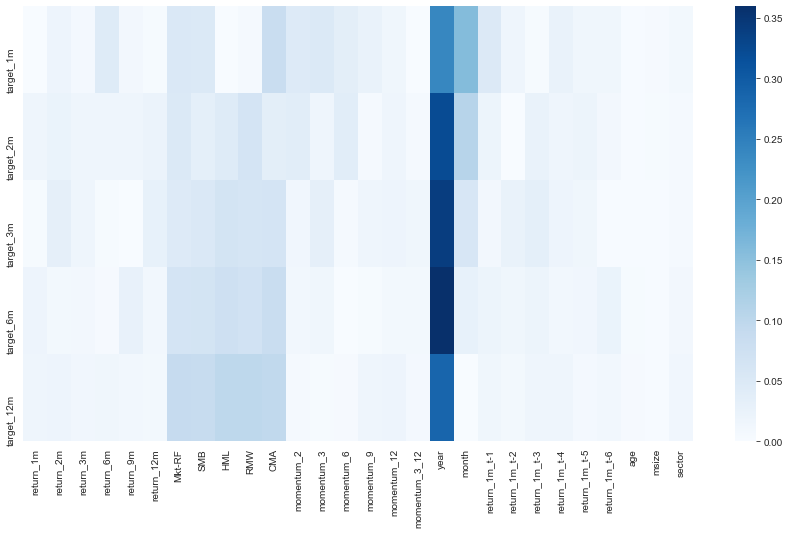

In [4]:
fig, ax= plt.subplots(figsize=(15, 8))
sns.heatmap(mutual_info.div(mutual_info.sum()).T, ax=ax, cmap='Blues');

In [5]:
target_labels = [f'target_{i}m' for i in [1, 2, 3, 6, 12]]
dummy_targets = dummy_data.dropna().loc[:, target_labels]

dummy_features = dummy_data.dropna().drop(target_labels, axis=1)
cat_cols = [c for c in dummy_features.columns if c not in features.columns]
discrete_features = [dummy_features.columns.get_loc(c) for c in cat_cols]
mutual_info_dummies = pd.DataFrame()
for label in target_labels:
    mi = mutual_info_classif(X=dummy_features, y=(dummy_targets[label]> 0).astype(int), random_state=42,
                             discrete_features=discrete_features) # index array is req
    mutual_info_dummies[label] = pd.Series(mi, index=dummy_features.columns)
mutual_info_dummies.sum()

target_1m     0.035691
target_2m     0.059732
target_3m     0.093805
target_6m     0.136928
target_12m    0.204094
dtype: float64

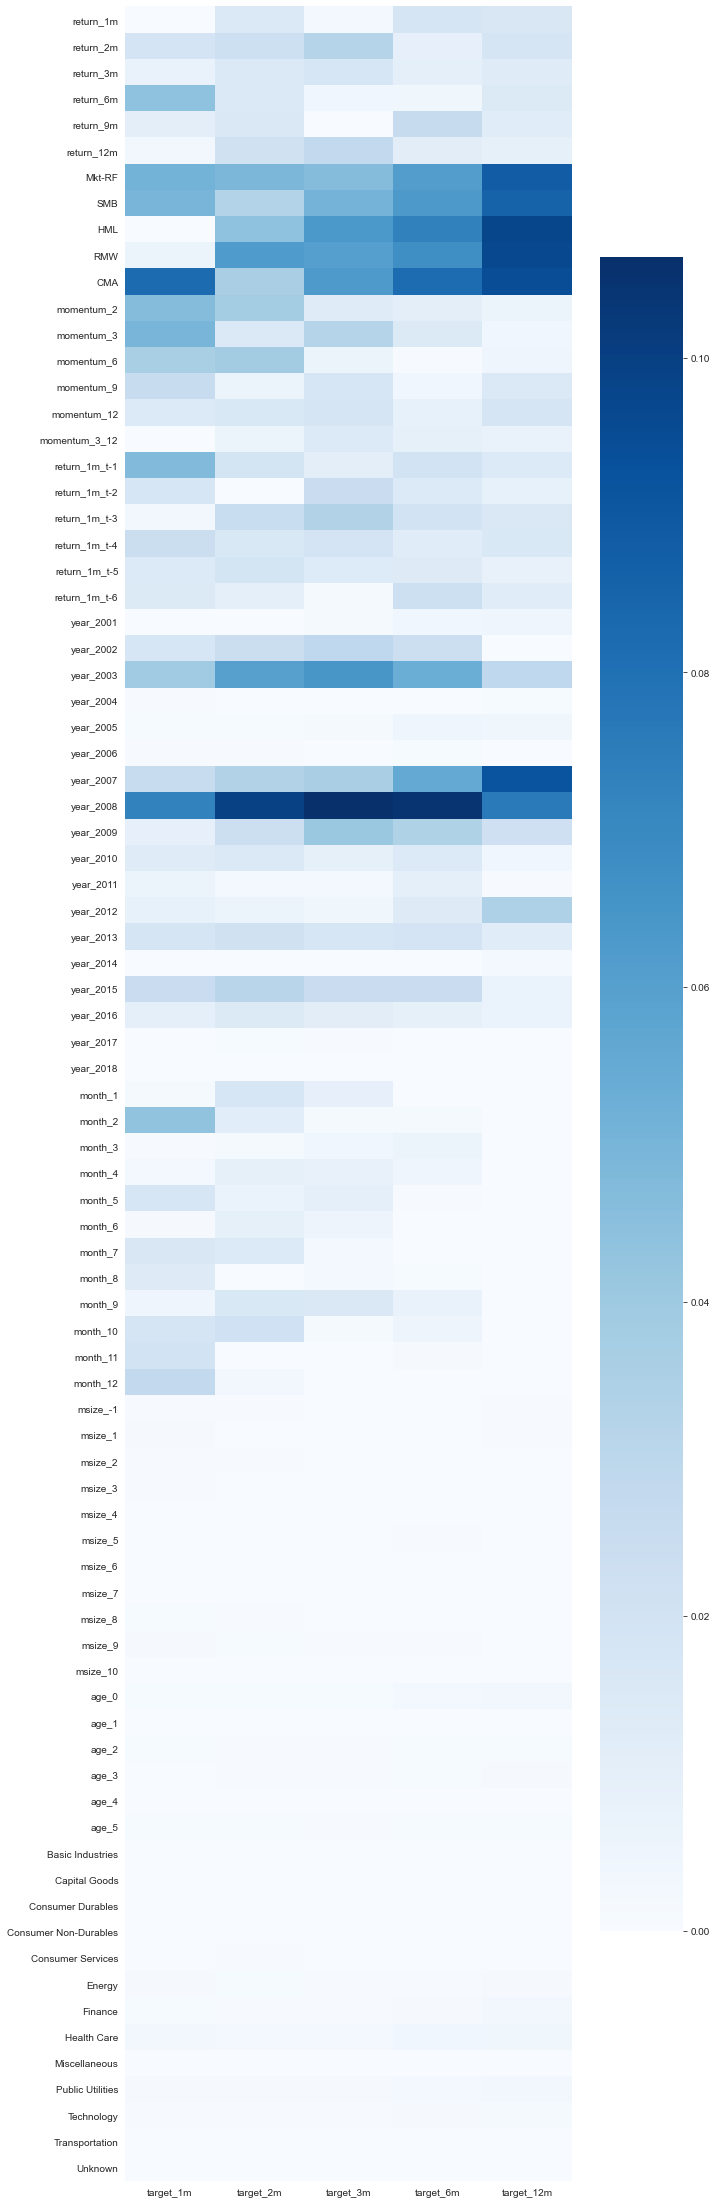

In [9]:
fig, ax= plt.subplots(figsize=(10, 40))
sns.heatmap(mutual_info_dummies.div(mutual_info_dummies.sum()), ax=ax, cmap='Blues');